# User Experience Analysis

In [53]:
# Import Libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

from matplotlib import cm

In [3]:
%matplotlib inline
#display-related options
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)

In [4]:
CSV_PATH = "../data/raw/Week1_challenge_data_source.csv"

In [7]:
def read_raw_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [8]:
xDR_df = read_raw_data(CSV_PATH)

file read as csv


In [9]:
xDR_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1.824e+06,2.080e+14,3.366e+10,3.550e+13,9.16E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.824e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1.546e+06,24420.0,1.634e+06,1.271e+06,3.564e+06,137762.0,1.585e+07,2.501e+06,8.199e+06,9.656e+06,2.781e+08,1.434e+07,1.717e+08,8.814e+06,3.675e+07,3.089e+08
1,1.310e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1.365e+06,2.080e+14,3.368e+10,3.580e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1.926e+06,7165.0,3.494e+06,9.202e+05,6.290e+05,308339.0,2.025e+07,1.911e+07,1.834e+07,1.723e+07,6.088e+08,1.171e+06,5.269e+08,1.506e+07,5.380e+07,6.534e+08
2,1.310e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1.362e+06,2.080e+14,3.376e+10,3.530e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.362e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1.684e+06,42224.0,8.535e+06,1.694e+06,2.690e+06,672973.0,1.973e+07,1.470e+07,1.759e+07,6.163e+06,2.296e+08,3.956e+05,4.107e+08,4.216e+06,2.788e+07,2.798e+08
3,1.310e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1.322e+06,2.080e+14,3.375e+10,3.540e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.322e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,6.441e+05,13372.0,9.024e+06,2.788e+06,1.440e+06,631229.0,2.139e+07,1.515e+07,1.399e+07,1.098e+06,7.995e+08,1.085e+07,7.490e+08,1.280e+07,4.332e+07,8.460e+08
4,1.310e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1.089e+06,2.080e+14,3.370e+10,3.540e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,8.626e+05,50188.0,6.248e+06,1.501e+06,1.936e+06,173853.0,1.526e+07,1.896e+07,1.712e+07,4.152e+05,5.277e+08,3.530e+06,5.507e+08,1.391e+07,3.854e+07,5.691e+08


In [10]:
experience_df = xDR_df[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',            
           'Handset Type']].copy()

In [11]:
experience_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366e+10,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368e+10,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376e+10,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375e+10,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined
4,3.370e+10,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


## Handling missing values

<AxesSubplot:>

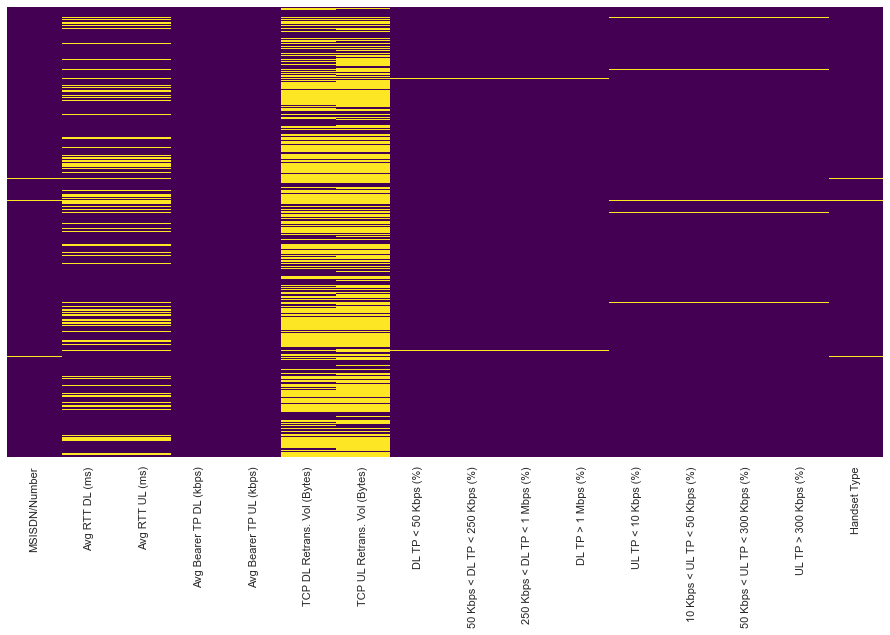

In [12]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(experience_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
def percent_missing(df):

    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    return round((totalMissing / totalCells) * 100, 2)

In [14]:
print("this dataset contains", percent_missing(experience_df), "%", "missing values.")

this dataset contains 10.34 % missing values.


In [17]:
experience_df['MSISDN/Number'] = experience_df['MSISDN/Number'].fillna('Uknown')
experience_df['Handset Type'] = experience_df['Handset Type'].fillna('Uknown')
experience_df.fillna(experience_df.mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_15500/3591641808.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  experience_df.fillna(experience_df.mean(), inplace=True)


In [18]:
print("this data frame contains", percent_missing(experience_df), "%", "missing values.")

this data frame contains 0.0 % missing values.


## Handling outliers

<AxesSubplot:xlabel='DL TP > 1 Mbps (%)'>

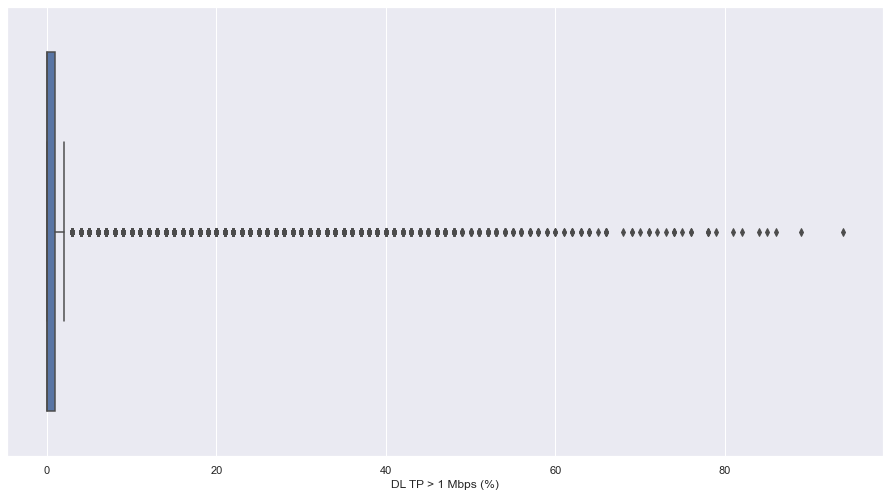

In [20]:
sns.boxplot(x=experience_df['DL TP > 1 Mbps (%)'],data=experience_df)

In [21]:
def outlier(df):
    column_name=['Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].mean(),np.where(df[i]<lower_quartile,df[i].mean(),df[i]))
    return df

In [22]:
experience_df=outlier(experience_df)

In [23]:
experience_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MSISDN/Number                   150001 non-null  object 
 1   Avg RTT DL (ms)                 150001 non-null  float64
 2   Avg RTT UL (ms)                 150001 non-null  float64
 3   Avg Bearer TP DL (kbps)         150001 non-null  float64
 4   Avg Bearer TP UL (kbps)         150001 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)     150001 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)     150001 non-null  float64
 7   DL TP < 50 Kbps (%)             150001 non-null  float64
 8   50 Kbps < DL TP < 250 Kbps (%)  150001 non-null  float64
 9   250 Kbps < DL TP < 1 Mbps (%)   150001 non-null  float64
 10  DL TP > 1 Mbps (%)              150001 non-null  float64
 11  UL TP < 10 Kbps (%)             150001 non-null  float64
 12  10 Kbps < UL TP 

<AxesSubplot:xlabel='DL TP > 1 Mbps (%)'>

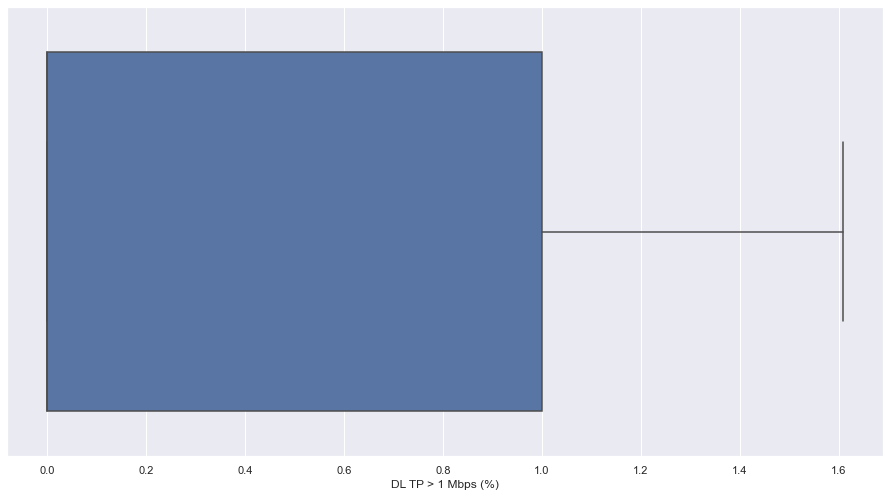

In [24]:
#checking for outliers
sns.boxplot(x=experience_df['DL TP > 1 Mbps (%)'],data=experience_df)

In [25]:
#Calculate total TCP,RTT and Throughput
experience_df["Total TCP"] = experience_df['TCP DL Retrans. Vol (Bytes)'] + experience_df['TCP UL Retrans. Vol (Bytes)']+experience_df['TCP DL Retrans. Vol (Bytes)']+ experience_df['TCP UL Retrans. Vol (Bytes)']
experience_df["Total RTT"] = experience_df['Avg RTT DL (ms)']+experience_df['Avg RTT UL (ms)']
experience_df["Total Throughput"] = experience_df['DL TP < 50 Kbps (%)'] + experience_df['50 Kbps < DL TP < 250 Kbps (%)'] + experience_df['250 Kbps < DL TP < 1 Mbps (%)'] + experience_df['DL TP > 1 Mbps (%)'] + experience_df['UL TP < 10 Kbps (%)'] + experience_df['10 Kbps < UL TP < 50 Kbps (%)'] + experience_df['50 Kbps < UL TP < 300 Kbps (%)'] + experience_df['UL TP > 300 Kbps (%)']


In [26]:
experience_agg_by_customer = experience_df.groupby('MSISDN/Number').agg({'Total TCP': 'sum',
                                                                          'Total RTT': 'sum',
                                                                          'Total Throughput': 'sum', 
                                                                           'Handset Type': lambda x: x.mode()[0]})

In [27]:
experience_agg_by_customer.head()

,Total TCP,Total RTT,Total Throughput,Handset Type
MSISDN/Number,,,,
33601001722.0,4.314e+07,63.663,200.000,Huawei P20 Lite Huawei Nova 3E
33601001754.0,4.314e+07,127.459,200.000,Apple iPhone 7 (A1778)
33601002511.0,4.314e+07,127.459,200.000,undefined
33601007832.0,4.314e+07,84.000,200.000,Apple iPhone 5S (A1457)
33601008617.0,8.245e+07,218.459,398.548,Apple iPhone Se (A1723)


In [28]:
#TCP values in the dataset.
tcp_trans = experience_agg_by_customer.sort_values(by=['Total TCP'], ascending=False)

top_10_tcp = tcp_trans.head(10)
bot_10_tcp = tcp_trans.tail(10)
most_tcp_frq = tcp_trans['Total TCP'].value_counts().head(10)

In [30]:
top_10_tcp[['Total TCP']]

,Total TCP
MSISDN/Number,
Uknown,4.537e+10
33626320676.0,7.765e+08
33614892860.0,7.334e+08
33625779332.0,7.334e+08
33659725664.0,6.902e+08
33760536639.0,6.393e+08
33675877202.0,6.197e+08
33667163239.0,5.570e+08
33786323068.0,5.177e+08


In [31]:
bot_10_tcp[['Total TCP']]

,Total TCP
MSISDN/Number,
33659647746.0,3.922e+07
33659655111.0,3.922e+07
33659663137.0,3.922e+07
33770718800.0,3.922e+07
33659676396.0,3.922e+07
33659677078.0,3.922e+07
33659683216.0,3.922e+07
33659687281.0,3.922e+07
33659696258.0,3.922e+07


In [32]:
most_tcp_frq

4.314e+07    47125
4.314e+07    12739
8.628e+07     7468
4.314e+07     5744
8.628e+07     4654
3.931e+07     4604
3.922e+07     3096
4.304e+07     2394
8.628e+07     2202
4.314e+07     1692
Name: Total TCP, dtype: int64

In [33]:
#RTT values in the dataset
tcp_rtt = experience_agg_by_customer.sort_values(by=['Total RTT'], ascending=False)

top_10_rtt = tcp_rtt.head(10)
bot_10_rtt = tcp_rtt.tail(10)
most_rtt_frq = tcp_rtt['Total RTT'].value_counts().head(10)

In [34]:
top_10_rtt[['Total RTT']]

,Total RTT
MSISDN/Number,
Uknown,105998.137
33626320676.0,2210.277
33614892860.0,2023.697
33625779332.0,1879.780
33760536639.0,1815.432
33786323068.0,1513.177
33667163239.0,1469.382
33666464084.0,1321.404
33659725664.0,1257.077


In [35]:
bot_10_rtt[['Total RTT']]

,Total RTT
MSISDN/Number,
33615426567.0,38.0
33763307076.0,38.0
33668742204.0,38.0
33661287634.0,38.0
33680489559.0,38.0
33669109353.0,38.0
33650787012.0,38.0
33606848562.0,38.0
33607296984.0,38.0


In [36]:
most_rtt_frq

127.459    16353
127.459    14775
114.796     2984
112.796     2212
113.796     2155
254.917     1908
115.796     1726
254.917     1330
116.796     1037
55.663       828
Name: Total RTT, dtype: int64

In [37]:
#Throughput values in the dataset
tcp_throuput = experience_agg_by_customer.sort_values(by=['Total Throughput'], ascending=False)

top_10_throuput = tcp_throuput.head(10)
bot_10_throuput = tcp_throuput.tail(10)
most_rtt_throuput = tcp_throuput['Total Throughput'].value_counts().head(10)

In [38]:
top_10_throuput[['Total Throughput']]

,Total Throughput
MSISDN/Number,
Uknown,211564.144
33626320676.0,3573.983
33625779332.0,3375.530
33614892860.0,3364.821
33659725664.0,3172.722
33760536639.0,2985.938
33675877202.0,2976.010
33667163239.0,2572.451
33786323068.0,2388.937


In [39]:
bot_10_throuput[['Total Throughput']]

,Total Throughput
MSISDN/Number,
33648553125.0,192.717
33666615355.0,192.610
33699909517.0,192.610
33616804993.0,192.610
33662561141.0,192.599
33666135518.0,192.140
33661460401.0,192.065
33699431274.0,191.917
33666036742.0,191.917


In [40]:
most_rtt_throuput

200.000    47723
400.000     7112
198.548     5171
199.000     3105
198.000     2836
398.548     2600
198.241     2009
197.000     1929
196.631     1085
197.631     1022
Name: Total Throughput, dtype: int64

## The distribution of the average throughput  per handset type

In [41]:
handset_type_df = experience_agg_by_customer.groupby('Handset Type').agg(
    {'Total Throughput': 'mean', 'Total RTT': 'mean'})
handset_type_df.head()

,Total Throughput,Total RTT
Handset Type,,
A-Link Telecom I. Cubot A5,197.454,57.663
A-Link Telecom I. Cubot Note Plus,198.717,117.796
A-Link Telecom I. Cubot Note S,198.241,113.796
A-Link Telecom I. Cubot Nova,198.548,44.000
A-Link Telecom I. Cubot Power,198.241,43.000


In [42]:
sorted_by_tcp = handset_type_df.sort_values(
    'Total Throughput', ascending=False)
top_tcp = sorted_by_tcp['Total Throughput']

In [43]:
top_tcp.head()

Handset Type
Uknown                     211564.144
Huawei Me909S-120             698.920
Huawei B618S-22D              663.039
Apple iPhone Xr (A2106)       598.500
Huawei Evr-Al00               598.000
Name: Total Throughput, dtype: float64

In [44]:
sorted_by_tcp = handset_type_df.sort_values(
    'Total RTT', ascending=False)
top_tcp = sorted_by_tcp['Total RTT']

In [45]:
top_tcp.head()

Handset Type
Uknown                            105998.137
Huawei Me909S-120                    425.876
Huawei B618S-22D                     409.890
Huawei Evr-Al00                      309.580
Tp-Link Technolo. Archer Mr200       287.266
Name: Total RTT, dtype: float64

## Performing a k-means clustering (where k = 3) to segment users into groups of experiences

In [48]:
def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

In [49]:
metrics = experience_agg_by_customer[[ 'Total TCP','Total RTT', 'Total Throughput']]
normalized_metrics = scale_and_normalize(metrics, [ 'Total TCP','Total RTT', 'Total Throughput'])
normalized_metrics.describe()

,Total TCP,Total RTT,Total Throughput
count,106857.000,106857.000,106857.000
mean,0.290,0.865,0.207
std,0.225,0.183,0.200
min,0.000,0.000,0.000
25%,0.102,0.782,0.049
50%,0.180,0.978,0.089
75%,0.484,0.994,0.398
max,0.989,1.000,1.000


In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

experience_metrics_with_cluster = experience_agg_by_customer.copy()
experience_metrics_with_cluster['clusters'] = pred
experience_metrics_with_cluster['clusters'].value_counts()

0    61235
2    24643
1    20979
Name: clusters, dtype: int64

In [52]:
experience_metrics_with_cluster = experience_metrics_with_cluster.rename(columns={'Total TCP': 'Total_TCP', 'Total RTT': 'Total_RTT','Total Throughput':'Total_Throughput'})


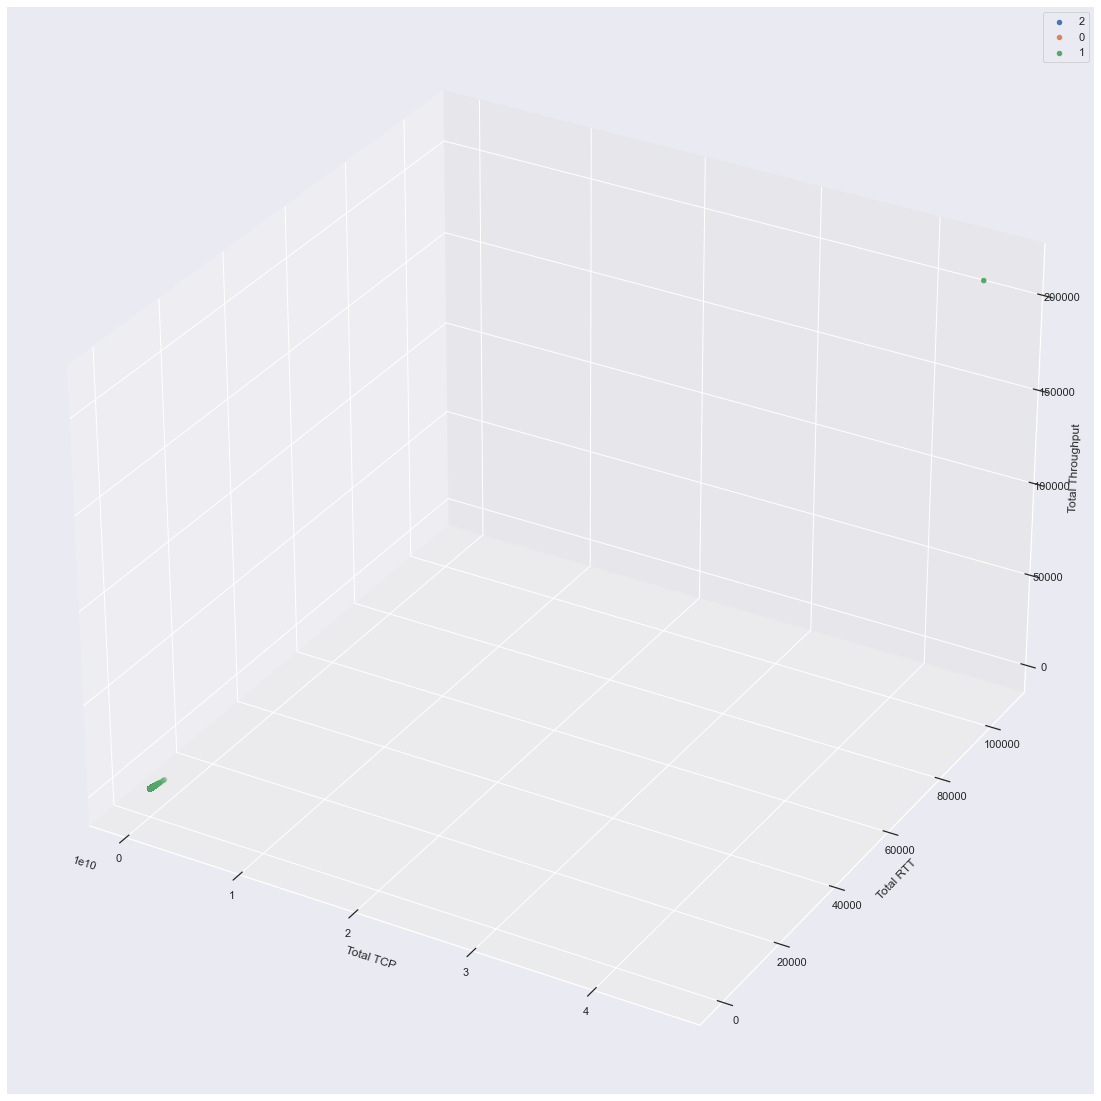

In [54]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
for s in experience_metrics_with_cluster.clusters.unique():
    ax.scatter(experience_metrics_with_cluster.Total_TCP[experience_metrics_with_cluster.clusters==s],experience_metrics_with_cluster.Total_RTT[experience_metrics_with_cluster.clusters==s],experience_metrics_with_cluster.Total_Throughput[experience_metrics_with_cluster.clusters==s],label=s)
    ax.set_xlabel('Total TCP')
    ax.set_ylabel('Total RTT')
    ax.set_zlabel('Total Throughput')
    ax.legend()

## Experience score to each user

In [55]:
experience_metrics_with_cluster_2 = experience_metrics_with_cluster.copy()
experience_metrics_with_cluster_2 = experience_metrics_with_cluster_2.drop('Handset Type', axis=1)
kmeans

KMeans(n_clusters=3)

In [56]:
distance = kmeans.fit_transform(experience_metrics_with_cluster_2)

distance_from_less_exp = list(map(lambda x : x[0], distance))

distance_from_less_exp
experience_metrics_with_cluster_2['Experiance_score'] = distance_from_less_exp

In [57]:
experience_metrics_with_cluster_2['MSISDN/Number'] = experience_metrics_with_cluster_2.index

In [58]:
experience_metrics_with_cluster_2.head()

,Total_TCP,Total_RTT,Total_Throughput,clusters,Experiance_score,MSISDN/Number
MSISDN/Number,,,,,,
33601001722.0,4.314e+07,63.663,200.000,2,3.996e+05,33601001722.0
33601001754.0,4.314e+07,127.459,200.000,0,3.996e+05,33601001754.0
33601002511.0,4.314e+07,127.459,200.000,0,3.996e+05,33601002511.0
33601007832.0,4.314e+07,84.000,200.000,0,3.996e+05,33601007832.0
33601008617.0,8.245e+07,218.459,398.548,2,3.971e+07,33601008617.0


In [59]:
experience_metrics_with_cluster_2.to_csv("../data/cleaned/user_experience_data.csv")